In [14]:
import gzip
import os
import pathlib

In [2]:
eeg_root_train = 'data/eeg/SMNI_CMI_TRAIN'
eeg_root_test = 'data/eeg/SMNI_CMI_TEST'

In [4]:
os.listdir(eeg_root_train)

['co2a0000372',
 'co2a0000375',
 'co2c0000344',
 'co2c0000342',
 'co2c0000345',
 'co2a0000368',
 'co2a0000369',
 'README',
 'co2a0000370',
 'co2a0000377',
 'co2a0000378',
 'co2a0000371',
 'co2c0000340',
 'co2c0000347',
 'co2c0000346',
 'co2c0000341',
 'co2c0000337',
 'co2c0000339',
 'co2c0000338',
 'co2a0000365',
 'co2a0000364']

In [46]:
def parse_eeg_file(filename):
    with gzip.open(filename, 'rb') as f:
        chans = {}
        for line in f:
            tokens = line.decode('ascii').split()
            if tokens[0] == '25':
                if tokens[1] not in chans.keys():
                    chans[tokens[1]] = []
                chans[tokens[1]].append(float(tokens[3]))
        chan_arrays = []
        for chan in chans.values():
            chan_arrays.append(chan)
    return chan_arrays

In [54]:
def parse_eeg_dataset(root):
    dataset = []
    for folder in os.listdir(root):
        if folder != 'README':
            subfolder = os.path.join(root, folder)
            for filename in os.listdir(subfolder):
                f = os.path.join(subfolder, filename)
                if '.gz' in pathlib.Path(f).suffixes:
                    chan_arrays = parse_eeg_file(f)
                    dataset.extend(chan_arrays)
    return dataset

In [55]:
len(parse_eeg_dataset(eeg_root_train))

256

In [56]:
train_chan_arrays = parse_eeg_dataset(eeg_root_train)

In [63]:
len(train_chan_arrays)

896

In [58]:
import matplotlib.pyplot as plt

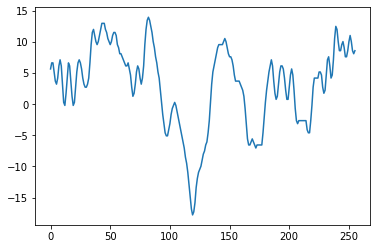

In [61]:
plt.plot(train_dataset[0])